In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from keras.layers import Conv1D, BatchNormalization, Activation, MaxPool1D, Flatten, Dense, Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from  tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
# https://teratail.com/questions/367645
import pandas as pd

In [2]:
X, y = load_breast_cancer(return_X_y=True)

In [3]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
X = X.reshape(-1, 30, 1)
y = to_categorical(y.reshape(-1, 1))

In [5]:
# featurewiseな標準化
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
X_train[0]

array([[-0.74902829],
       [-1.09363975],
       [-0.74055999],
       [-0.71099466],
       [ 0.58638323],
       [-0.41808829],
       [-0.44845498],
       [-0.75393607],
       [-0.11908877],
       [ 0.41711442],
       [-0.72823773],
       [-0.09226561],
       [-0.64307408],
       [-0.57198019],
       [-0.6946878 ],
       [-0.24245658],
       [ 0.32050519],
       [-0.60960616],
       [-0.25575397],
       [-0.06842713],
       [-0.80124161],
       [-0.61509735],
       [-0.75123496],
       [-0.72598829],
       [ 0.1241172 ],
       [-0.3388401 ],
       [-0.06039354],
       [-0.61357437],
       [ 0.06510643],
       [ 0.43524596]])

Epoch 1/100
13/13 [==============================] - 3s 39ms/step - loss: 0.5706 - acc: 0.7839 - auc: 0.8376 - val_loss: 0.6568 - val_acc: 0.8363 - val_auc: 0.8986
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 0.3387 - acc: 0.9171 - auc: 0.9741 - val_loss: 0.6116 - val_acc: 0.8889 - val_auc: 0.9579
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 0.2510 - acc: 0.9422 - auc: 0.9838 - val_loss: 0.5618 - val_acc: 0.9006 - val_auc: 0.9753
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 0.2021 - acc: 0.9422 - auc: 0.9895 - val_loss: 0.5117 - val_acc: 0.8947 - val_auc: 0.9776
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 0.1587 - acc: 0.9623 - auc: 0.9935 - val_loss: 0.4674 - val_acc: 0.9006 - val_auc: 0.9796
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 0.1383 - acc: 0.9673 - auc: 0.9952 - val_loss: 0.4226 - val_acc: 0.9006 - val_auc: 0.9803
Epoch 7/100
13/1

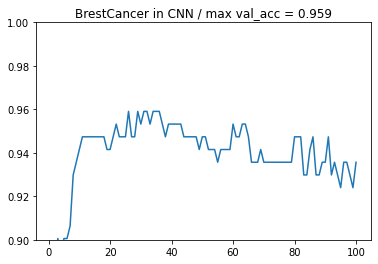

In [14]:
def create_single_module(input_tensor, output_channel):
    x = Conv1D(output_channel, kernel_size=3)(input_tensor)
    x = BatchNormalization()(x)
    return Activation("relu")(x)

input = Input(shape=(30, 1)) # Brest-cancerは30次元
x = create_single_module(input, 8) # 30->28 dim
x = MaxPool1D(2)(x) # 28 -> 14dim
x = create_single_module(x, 16) # 14 -> 12
x = create_single_module(x, 16) # 12 -> 10
x = MaxPool1D(2)(x) # 10 -> 5
x = create_single_module(x, 32)
x = Flatten()(x)
x = Dense(2, activation="softmax")(x)

model = Model(input, x)
model.compile(Adam(lr=1e-3), loss="binary_crossentropy", metrics=["acc", "AUC"])
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test)).history

max_val_acc = max(history["val_acc"])
plt.plot(np.arange(100)+1, history["val_acc"])
plt.ylim((0.9, 1))
plt.title(f"BrestCancer in CNN / max val_acc = {max_val_acc:.3}")
plt.show()

In [8]:
#モデルを保存する
model.save('image-classification.h5')

In [15]:
history.keys()

dict_keys(['loss', 'acc', 'auc', 'val_loss', 'val_acc', 'val_auc'])

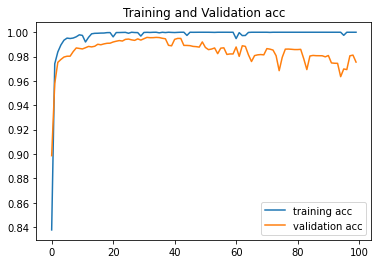

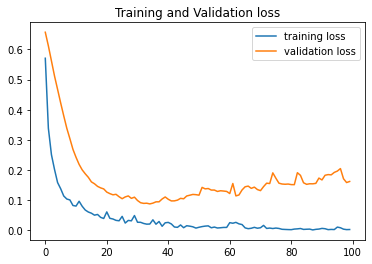

In [18]:
def compare_TV(history):
    import matplotlib.pyplot as plt

    # Setting Parameters
    acc = history['auc']
    val_acc = history['val_auc']
    loss = history['loss']
    val_loss = history['val_loss']

    epochs = range(len(acc))

    # 1) Accracy Plt
    plt.plot(epochs, acc ,label = 'training acc')
    plt.plot(epochs, val_acc, label= 'validation acc')
    plt.title('Training and Validation acc')
    plt.legend()

    plt.figure()

    # 2) Loss Plt
    plt.plot(epochs, loss ,label = 'training loss')
    plt.plot(epochs, val_loss , label= 'validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()
compare_TV(history)


In [19]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 conv1d_12 (Conv1D)          (None, 28, 8)             32        
                                                                 
 batch_normalization_12 (Bat  (None, 28, 8)            32        
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 28, 8)             0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 14, 8)            0         
 1D)                                                             
                                                                 
 conv1d_13 (Conv1D)          (None, 12, 16)            400 

In [21]:
w = model.get_layer('conv1d_15').kernel.numpy()
print(type(w))
# <class 'numpy.ndarray'>

print(w.shape)

<class 'numpy.ndarray'>
(3, 16, 32)


In [ ]:
# 可視化手法
# # https://note.nkmk.me/python-tensorflow-keras-get-weights-kernel-bias/